## 필수과제2
- 위에 배웠던 모든 스케일링과 인코딩을 진행해 주세요.
- 데이터를 드릴 예정이며 해당 데이터들 가지고 스케일링 및 인코딩을 진행해 주세요.

- 기존 데이터 분포를 확인해보고 -> 이 데이터 분포를 통해서 어떤 식으로 스케일링을 해야 하는지?
- 고민해 보시고 정리해주세요.
- 이상치가 많다
- 치우쳐진 데이터다.
- 요약통계나, 시각화를 통해서 확인할 수 있다.
- 정규분포인지아닌지 통계치를 가지고 검정할 수 있다.
- csv파일로도 준비 부탁드릴게요.

- 여러분들이 스케일링한 데이터를 가지고 모델링을 돌려보려고 한다.
- csv파일로 스케일링 된 데이터를 실제 머신에 넣어보고 어떤 정확도, RMSE 값이 나오는지 확인해 보자!
- csv파일은 랜덤으로 요청할 것


- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the **target**, the column you are trying to predict.

In [245]:
import pandas as pd
ss = pd.read_csv('/content/spaceship_tt.csv')
ss

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [246]:
# data의 컬럼들 확인
ss.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [247]:
ss.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

# 칼럼 정보
- ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age','VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Name','Transported']
- 분석 제외 칼럼 : PassengerId, Name
- 범주형 컬럼 : HomePlanet, CryoSleep, Destination, VIP
- 연속형 컬럼 : Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
- Cabin은 Cabin_deck, Cabin_num, Cabin_side로 세분화 후 , Cabin_deck, Cabin_side는 범주화 컬럼, Cabin_num은 연속형 컬럼으로 분류
(Takes the form deck/num/side, where side can be either P for Port or S for Starboard.)


### 칼럼 분포 확인

In [248]:
ss.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [249]:
ss.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [250]:
ss.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

(array([ 591.,  649., 2089., 1976., 1350.,  893.,  536.,  294.,  106.,
          30.]),
 array([ 0. ,  7.9, 15.8, 23.7, 31.6, 39.5, 47.4, 55.3, 63.2, 71.1, 79. ]),
 <BarContainer object of 10 artists>)

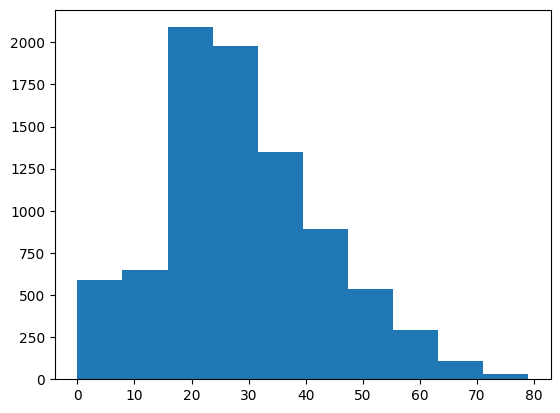

In [251]:
import matplotlib.pyplot as plt
plt.hist(ss.Age)

In [252]:
ss.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

(array([8.156e+03, 2.540e+02, 6.500e+01, 1.700e+01, 9.000e+00, 9.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  1432.7,  2865.4,  4298.1,  5730.8,  7163.5,  8596.2,
        10028.9, 11461.6, 12894.3, 14327. ]),
 <BarContainer object of 10 artists>)

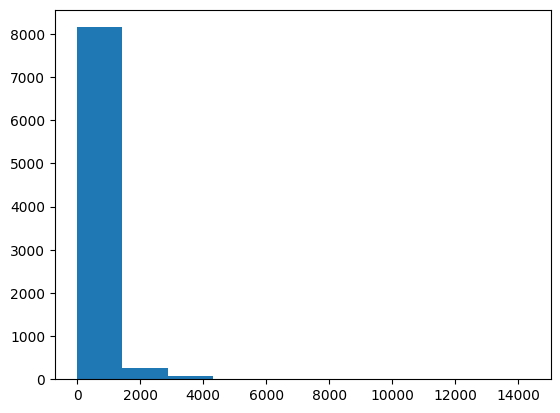

In [253]:
cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',]
plt.hist(ss.RoomService)

(array([8.114e+03, 2.500e+02, 8.000e+01, 3.400e+01, 1.500e+01, 9.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 3.000e+00]),
 array([    0. ,  2981.3,  5962.6,  8943.9, 11925.2, 14906.5, 17887.8,
        20869.1, 23850.4, 26831.7, 29813. ]),
 <BarContainer object of 10 artists>)

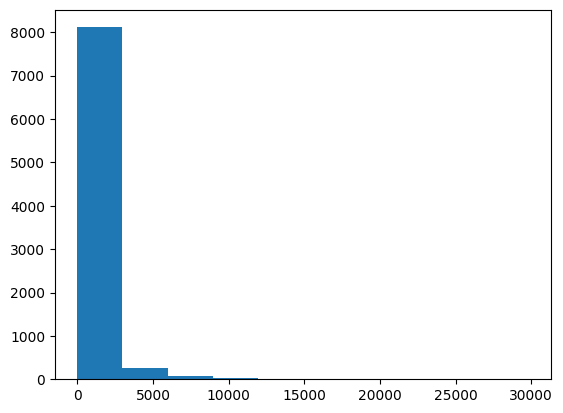

In [254]:
plt.hist(ss.FoodCourt)

(array([8.401e+03, 6.200e+01, 1.300e+01, 5.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  2349.2,  4698.4,  7047.6,  9396.8, 11746. , 14095.2,
        16444.4, 18793.6, 21142.8, 23492. ]),
 <BarContainer object of 10 artists>)

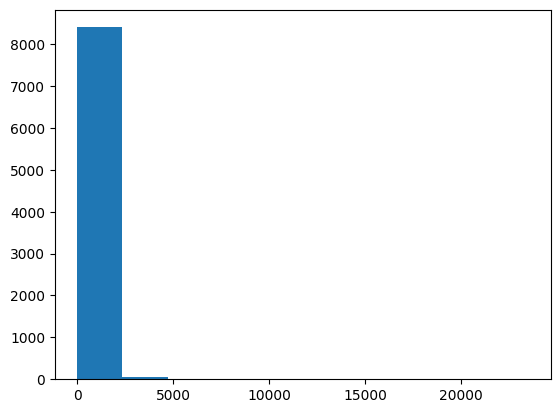

In [255]:
plt.hist(ss.ShoppingMall)

(array([8.204e+03, 1.800e+02, 7.300e+01, 2.200e+01, 1.500e+01, 6.000e+00,
        6.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([    0. ,  2240.8,  4481.6,  6722.4,  8963.2, 11204. , 13444.8,
        15685.6, 17926.4, 20167.2, 22408. ]),
 <BarContainer object of 10 artists>)

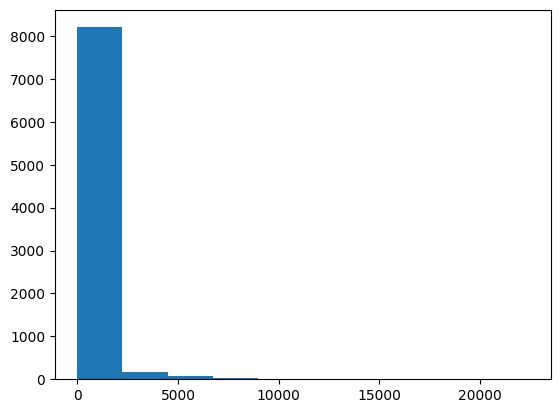

In [256]:
plt.hist(ss.Spa)

(array([8.252e+03, 1.360e+02, 6.000e+01, 2.600e+01, 1.800e+01, 7.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([    0. ,  2413.3,  4826.6,  7239.9,  9653.2, 12066.5, 14479.8,
        16893.1, 19306.4, 21719.7, 24133. ]),
 <BarContainer object of 10 artists>)

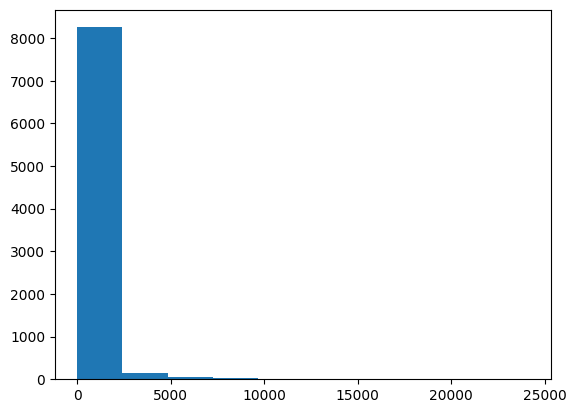

In [257]:
plt.hist(ss.VRDeck)

### Cabin 칼럼 세분화
- Cabin은 Cabin_deck, Cabin_num, Cabin_side로 세분화 후 , Cabin_deck, Cabin_side는 범주화 컬럼, Cabin_num은 연속형 컬럼으로 분류 (Takes the form deck/num/side, where side can be either P for Port or S for Starboard.)

In [258]:
ss["Cabin_deck"]= ss.Cabin.str.split('/').str[0]
ss["Cabin_num"]= ss.Cabin.str.split('/').str[1]
ss["Cabin_side"]= ss.Cabin.str.split('/').str[2]

In [259]:
ss.Cabin_deck.value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_deck, dtype: int64

In [260]:
ss.Cabin_side.value_counts()

S    4288
P    4206
Name: Cabin_side, dtype: int64

(array([2077., 1526.,  773.,  611.,  566.,  602.,  495.,  505.,  329.,
         267.]),
 array([   0. ,  178.7,  357.4,  536.1,  714.8,  893.5, 1072.2, 1250.9,
        1429.6, 1608.3, 1787. ]),
 <BarContainer object of 10 artists>)

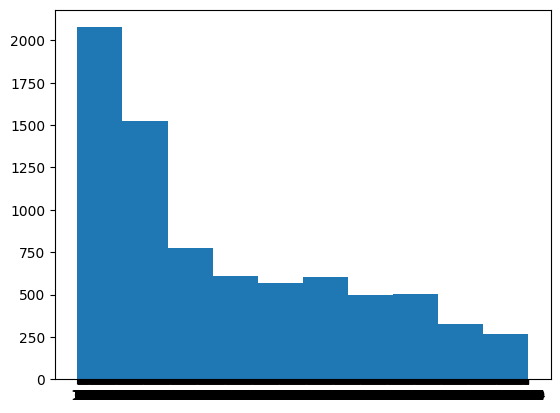

In [331]:
plt.hist(ss.Cabin_num)

In [262]:
# 이제 Cabin 칼럼 자체는 삭제하기
ss=ss[[ 'HomePlanet', 'CryoSleep', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
        'Transported', 'Cabin_deck', 'Cabin_num', 'Cabin_side']]

##  Null값 채우기

In [273]:
ss.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age             169
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Cabin_deck        0
Cabin_num         0
Cabin_side        0
dtype: int64

In [264]:
# HomePlanet Null값 행 삭제
ss.dropna(subset='HomePlanet', axis=0, inplace=True)
ss.reset_index(drop=True, inplace=True)

<ipython-input-264-685efa47823b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss.dropna(subset='HomePlanet', axis=0, inplace=True)


In [265]:
# CryoSleep Null값 행 삭제
ss.dropna(subset='CryoSleep', axis=0, inplace=True)
ss.reset_index(drop=True, inplace=True)
# Destinaton Null값 행 삭제
ss.dropna(subset='Destination', axis=0, inplace=True)
ss.reset_index(drop=True, inplace=True)

<ipython-input-265-8f44a1117045>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss.dropna(subset='CryoSleep', axis=0, inplace=True)
<ipython-input-265-8f44a1117045>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss.dropna(subset='Destination', axis=0, inplace=True)


In [266]:
# Cabin_side 값 행 삭제
ss.dropna(subset='Cabin_side', axis=0, inplace=True)
ss.reset_index(drop=True, inplace=True)

<ipython-input-266-452d6cd263d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss.dropna(subset='Cabin_side', axis=0, inplace=True)


In [267]:
# VIP 값 False로 채우기
ss['VIP'].fillna(False, inplace= True)

<ipython-input-267-c2b73458f343>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss['VIP'].fillna(False, inplace= True)


In [268]:
ss.VIP.value_counts()

False    7737
True      183
Name: VIP, dtype: int64

In [269]:
cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in cols:
  ss= ss.astype({col :'float'})


In [270]:
## 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' 는 중간값으로 대체하기
import numpy as np
cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in cols:
  idx = ss[ss[col].notnull()].index
  med = np.median(ss[col][idx])
  ss[col].fillna(med, inplace= True)

In [274]:
# Age Null값 행 삭제
ss.dropna(subset='Age', axis=0, inplace=True)
ss.reset_index(drop=True, inplace=True)

# 인코딩
- HomePlanet, CryoSleep, Destination, VIP , Cabin_deck, Cabin_side
- 레이블인코딩 : Cabin_deck
- 원핫인코딩 : HomePlanet, CryoSleep, Destination, VIP ,Cabin_side

### 레이블 인코딩

In [282]:
from sklearn.preprocessing import LabelEncoder
items = ss.Cabin_deck

#LabelEncoder를 객체로 생성한 후, fit(), transform() 으로 레이블 인코딩 수행
encoder = LabelEncoder() # 생성
encoder.fit(items) # 학습
labels = encoder.transform(items)
ss['Cabin_deck']= labels

array([0, 1, 2, 3, 4, 5, 6, 7])

### 원핫인코딩

In [304]:
df_1 = pd.get_dummies(ss['HomePlanet'])
df_1 = df_1.rename(columns={'Earth':'HomePlanet_Earth', 'Europa':'HomePlanet_Europa', 'Mars':"HomePlanet_Mars"})
df_3 = pd.get_dummies(ss['Destination'])
df_3 = df_3.rename(columns={'55 Cancri e':'Destination_55 Cancri e', 'PSO J318.5-22':'Destination_PSO J318.5-22', 'TRAPPIST-1e':'Destination_TRAPPIST-1e'})
df_5 = pd.get_dummies(ss['Cabin_side'])
df_5 = df_5.rename(columns={'P':'Cabinside_P', 'S':'Cabinside_S'})


In [310]:
new = pd.concat([ss, df_1,  df_3, df_5],axis=1) #깔끔한 하나의 숫자로 완성된 데이터프레임을 만들 수 있다!
#  기존 컬럼과 겹치는거 방지
new= new[[ 'CryoSleep', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'Cabin_deck', 'Cabin_num','HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cabinside_P',
       'Cabinside_S']]


# 스케일링
- 'Age',  'RoomService', 'FoodCourt', 'ShoppingMall',       'Spa', 'VRDeck',  'Cabin_num',
- Standard : age
- MinMax : 'Cabin_num',
- Maxabs
- Robust:  'RoomService', 'FoodCourt', 'ShoppingMall',       'Spa', 'VRDeck',
- Normalize
      



## StandardScaler
- Age 칼럼

In [329]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#2차원 ndarray로 변환
items = np.array(new.Age).reshape(-1,1)
# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(items)
items_scaled = scaler.transform(items)

#transform()시 스케일 변화노딘 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
items_df_scaled = pd.DataFrame(data=items_scaled)
print('feature 들의 평균 값')
print(items_df_scaled.mean())
print('\nfeature들의 분산 값')
print(items_df_scaled.var())

# 칼럼 추가
new['Standard_Scale_Age']= items_df_scaled

feature 들의 평균 값
0    9.717137e-17
dtype: float64

feature들의 분산 값
0    1.000129
dtype: float64


## MinMaxScaler

In [334]:
from sklearn.preprocessing import MinMaxScaler
#2차원 ndarray로 변환
items = np.array(new.Cabin_num).reshape(-1,1)

#MinMaxScaler객체 생성
scaler = MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(items)
items_scaled = scaler.transform(items)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
items_scaled = pd.DataFrame(data=items_scaled)
print('feature들의 최솟값')
print(items_scaled.min())
print('\nfeature들의 최댓값')
print(items_scaled.max())

# 칼럼 추가
new['MinMax_Scale_Cabin_num']= items_scaled

feature들의 최솟값
0    0.0
dtype: float64

feature들의 최댓값
0    1.0
dtype: float64


## MaxAbsScaler
- Cabin_num은 음수값이 존재하지 않으므로 위에서 실행한 MinMaxScaler와 동일하게 결과 나옴 확인 가능

In [336]:
from sklearn.preprocessing import MaxAbsScaler

#2차원 ndarray로 변환
items = np.array(new.Cabin_num).reshape(-1,1)

# 변형 객체 생성
maxabs_scaler = MaxAbsScaler()

# 훈련데이터의 모수 분포 저장
maxabs_scaler.fit(items)

# 훈련 데이터 스케일링
items_scaled = maxabs_scaler.transform(items)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
items_df_scaled = pd.DataFrame(data=items_scaled)
print('feature들의 최솟값')
print(items_df_scaled.min())
print('\nfeature들의 최댓값')
print(items_df_scaled.max())




feature들의 최솟값
0    0.0
dtype: float64

feature들의 최댓값
0    1.0
dtype: float64


## RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler

cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in cols:
  #2차원 ndarray로 변환
  items = np.array(new[col]).reshape(-1,1)

  # 변형 객체 생성
  robust_scaler = RobustScaler()

  # 훈련데이터의 모수 분포 저장
  robust_scaler.fit(items)

  # 훈련 데이터 스케일링
  items_scaled = robust_scaler.transform(items)

  #transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
  items_df_scaled = pd.DataFrame(data=items_scaled)
  print('feature들의 최솟값')
  print(items_df_scaled.min())
  print('\nfeature들의 최댓값')
  print(items_df_scaled.max())

  # 칼럼 추가
  feat_name = 'Robust_Scale_'+col
  new[feat_name]= items_scaled


## Normalize

In [343]:
from sklearn.preprocessing import Normalizer
items = np.array(new.Age).reshape(-1,1)
# 변형 객체 생성
normal_scaler = Normalizer()

# 훈련데이터의 모수 분포 저장
normal_scaler.fit(items)

# 훈련 데이터 스케일링
X_train_scaled = normal_scaler.transform(items)
#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
ss_df_scaled = pd.DataFrame(data=X_train_scaled)
print('feature들의 최솟값')
print(ss_df_scaled.min())
print('\nfeature들의 최댓값')
print(ss_df_scaled.max())

feature들의 최솟값
0    0.0
dtype: float64

feature들의 최댓값
0    1.0
dtype: float64


## Log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


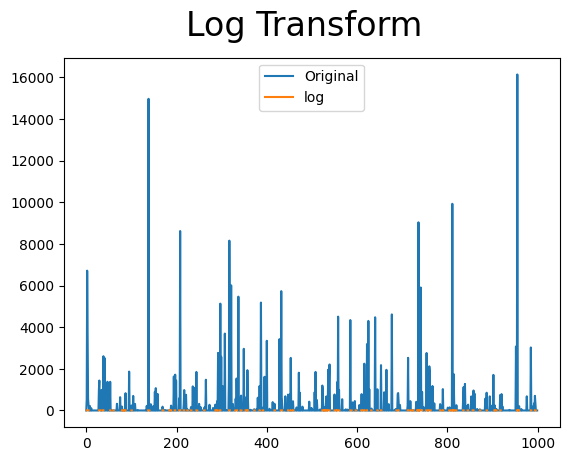

In [350]:
data = new.Spa[:1000]
y= np.log(data) # 로그변환
plt.plot(data, label = 'Original')
plt.plot(y, label = 'log')
plt.suptitle('Log Transform', size =  24)
plt.legend()
plt.show()

# 최종

In [351]:
new.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Cabin_deck', 'Cabin_num',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Cabinside_P', 'Cabinside_S',
       'Standard_Scale_Age', 'MinMax_Scale_Cabin_num',
       'Robust_Scale_RoomService', 'Robust_Scale_FoodCourt',
       'Robust_Scale_ShoppingMall', 'Robust_Scale_Spa', 'Robust_Scale_VRDeck'],
      dtype='object')

In [354]:
final = new[['CryoSleep',  'VIP',  'Cabin_deck',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Cabinside_P', 'Cabinside_S',
       'Standard_Scale_Age', 'MinMax_Scale_Cabin_num',
       'Robust_Scale_RoomService', 'Robust_Scale_FoodCourt',
       'Robust_Scale_ShoppingMall', 'Robust_Scale_Spa', 'Robust_Scale_VRDeck', 'Transported',]]
final

,CryoSleep,VIP,Cabin_deck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabinside_P,Cabinside_S,Standard_Scale_Age,MinMax_Scale_Cabin_num,Robust_Scale_RoomService,Robust_Scale_FoodCourt,Robust_Scale_ShoppingMall,Robust_Scale_Spa,Robust_Scale_VRDeck,Transported
0,False,False,1,0,1,0,0,0,1,1,0,0.701040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False
1,False,False,5,1,0,0,0,0,1,0,1,-0.331824,0.000000,2.534884,0.140625,1.041667,9.803571,1.073171,True
2,False,True,0,0,1,0,0,0,1,0,1,2.009335,0.000000,1.000000,55.875000,0.000000,119.910714,1.195122,False
3,False,False,0,0,1,0,0,0,1,0,1,0.287894,0.000000,0.000000,20.046875,15.458333,59.446429,4.707317,False
4,False,False,5,1,0,0,0,0,1,0,1,-0.882685,0.000528,7.046512,1.093750,6.291667,10.089286,0.048780,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7746,False,True,0,0,1,0,1,0,0,1,0,0.838755,0.051742,0.000000,106.546875,0.000000,29.339286,1.804878,False
7747,True,False,6,1,0,0,0,1,0,0,1,-0.744970,0.791447,0.000000,0.000000,0.000000,0.000000,0.000000,False
7748,False,False,6,1,0,0,0,0,1,0,1,-0.194109,0.791975,0.000000,0.000000,78.000000,0.017857,0.000000,True
7749,False,False,4,0,1,0,1,0,0,0,1,0.219037,0.321014,0.000000,16.390625,0.000000,6.303571,78.902439,False


In [356]:
final.to_csv('spaceship_tt_final.csv',index= False)

In [357]:
pd.read_csv('/content/spaceship_tt_final.csv')

,CryoSleep,VIP,Cabin_deck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabinside_P,Cabinside_S,Standard_Scale_Age,MinMax_Scale_Cabin_num,Robust_Scale_RoomService,Robust_Scale_FoodCourt,Robust_Scale_ShoppingMall,Robust_Scale_Spa,Robust_Scale_VRDeck,Transported
0,False,False,1,0,1,0,0,0,1,1,0,0.701040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False
1,False,False,5,1,0,0,0,0,1,0,1,-0.331824,0.000000,2.534884,0.140625,1.041667,9.803571,1.073171,True
2,False,True,0,0,1,0,0,0,1,0,1,2.009335,0.000000,1.000000,55.875000,0.000000,119.910714,1.195122,False
3,False,False,0,0,1,0,0,0,1,0,1,0.287894,0.000000,0.000000,20.046875,15.458333,59.446429,4.707317,False
4,False,False,5,1,0,0,0,0,1,0,1,-0.882685,0.000528,7.046512,1.093750,6.291667,10.089286,0.048780,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7746,False,True,0,0,1,0,1,0,0,1,0,0.838755,0.051742,0.000000,106.546875,0.000000,29.339286,1.804878,False
7747,True,False,6,1,0,0,0,1,0,0,1,-0.744970,0.791447,0.000000,0.000000,0.000000,0.000000,0.000000,False
7748,False,False,6,1,0,0,0,0,1,0,1,-0.194109,0.791975,0.000000,0.000000,78.000000,0.017857,0.000000,True
7749,False,False,4,0,1,0,1,0,0,0,1,0.219037,0.321014,0.000000,16.390625,0.000000,6.303571,78.902439,False
